In [1]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Turn off matplotlib plot in Notebook

import numpy as np
from pathlib import Path
#plt.ioff()
plt.rcParams["animation.ffmpeg_path"] = "/usr/bin/ffmpeg"

In [2]:
%matplotlib inline

In [3]:
files = Path("crash_water/debug_data")
#files = Path("debug_data")

In [4]:
debug_data = {"water": [], "dissolved": [], "velocity": [],"ground":[]}
for f in files.iterdir():
    #print(f.name)
    names = f.name.split("_")
    file_type = names[0]
    file_timestep = names[1].split(".")[0]
    data = np.load(f)
    for f_n in data:
        print(f_n)
    append_data = {"time":int(file_timestep),"data":data["0"]}
    debug_data[file_type].append(append_data)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [5]:
for k in debug_data:
    debug_data[k].sort(key=lambda d: d["time"])

In [6]:
print(debug_data["water"][0]["data"].shape)
test = np.vstack([debug_data["water"][0]["data"],debug_data["water"][1]["data"]])

print(test.shape)

(10, 400, 200, 1)
(20, 400, 200, 1)


(400, 200, 1)


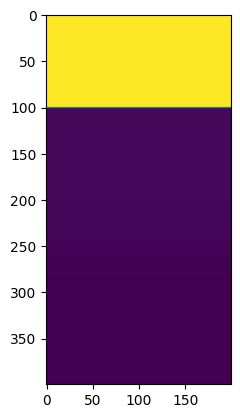

In [7]:
take = test[0,:,:,:]
print(take.shape)
plt.imshow(take)
plt.show()

In [8]:
stacked_data = {}
for key in debug_data:
    l = []
    for data in debug_data[key]:
        l.append(data["data"])
    print(len(l))
    stack = np.vstack(l)
    stacked_data[key]=stack

100
100
100
100


In [9]:
for key in stacked_data:
    print(stacked_data[key].shape)

(1000, 400, 200, 1)
(1000, 400, 200, 1)
(1000, 400, 200, 2)
(1000, 400, 200, 1)


(400, 200, 1)
AxesImage(size=(400, 200))


/tmp/ipykernel_39950/722060829.py:50: RuntimeWarning: overflow encountered in power
  mags = np.sqrt(np.power(u, 2.0)+np.power(v, 2.0))


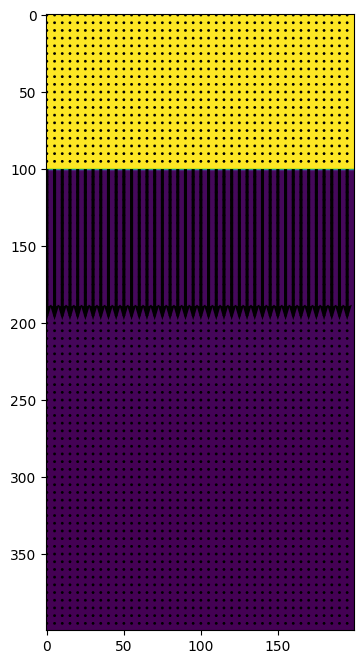

In [10]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(6,8))
ax = plt.axes()
print(stacked_data["water"][0,:,:,:].shape)
img = plt.imshow(stacked_data["water"][0,:,:,:])
print(img)
def make_uv(array,skip_interval):
    u = []
    v = []

    for x in range(0,array.shape[0]):
        for y in range(0,array.shape[1]):
            if  x % skip_interval == 0 and y % skip_interval == 0:

                u.append(array[x, y, 0])
                v.append(array[x, y, 1])
    #print("u len: {}".format(len(u)))
    """
    for x in range(0,array.shape[0]//skip_interval):
        for y in range(0,array.shape[1]//skip_interval):
            u.append(array[x*skip_interval,y*skip_interval,0])
            v.append(array[x*skip_interval,y*skip_interval,1])
    """
    #print("u len: {}".format(len(u)))
    u = np.array(u)
    v = np.array(v)
    return u,v
def make_quiver(skip_interval=5):
    x_arr = []
    y_arr = []
    u = []
    v = []
    #slope_path = Path("debug_data/velocity_10.npz")
    #data = np.load(slope_path)["0"][0]
    data = stacked_data["velocity"][30]
    
    for x in range(0,data.shape[0]):
        for y in range(0,data.shape[1]):
            if x % skip_interval == 0 and y % skip_interval == 0:
                x_arr.append(float(x))
                y_arr.append(float(y))
                u.append(100.0)
                v.append(100.0)
    #u, v = make_uv(data,skip_interval)
    DATA_LEN = len(x_arr)
    return ax.quiver(y_arr,x_arr,u,v,scale=100.0, width=0.01)
def animate_velocity(time,skip_interval=5):
    data = stacked_data["velocity"][time,:,:,:]
    u,v = make_uv(data,skip_interval)
    mags = np.sqrt(np.power(u, 2.0)+np.power(v, 2.0))

    quiver.set_UVC(v , u)
    return quiver
quiver = make_quiver()
def animate(frame_num):
    img.set_data(stacked_data["water"][frame_num,:,:,:])
    animate_velocity(frame_num)
    
    return img
anim = FuncAnimation(fig, animate, frames=stacked_data["water"].shape[0], interval=80)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.close()


(400, 200, 1)
AxesImage(size=(400, 200))


(400, 200, 1)
AxesImage(size=(400, 200))


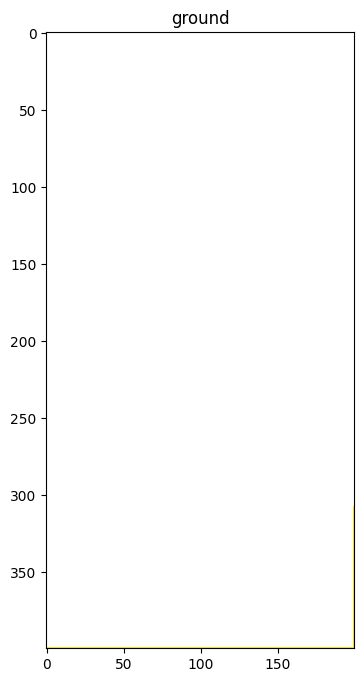

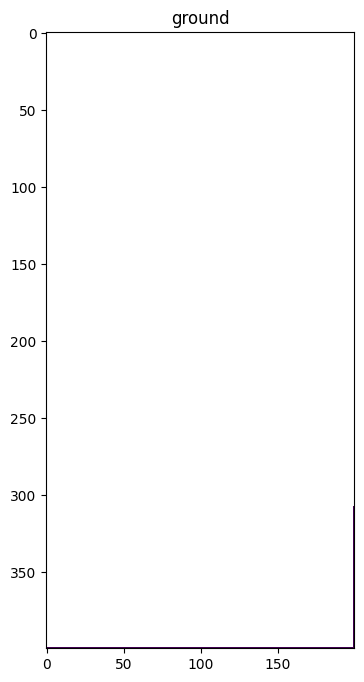

In [35]:
def make_animated_plot(data,velocity=None,title=None,total_time=10.0,frame_start_offset=0):

    
    def make_uv(array,skip_interval):
        u = []
        v = []

        for x in range(0,array.shape[0]):
            for y in range(0,array.shape[1]):
                if  x % skip_interval == 0 and y % skip_interval == 0:

                    u.append(array[x, y, 0])
                    v.append(array[x, y, 1])
    #print("u len: {}".format(len(u)))
        """
    for x in range(0,array.shape[0]//skip_interval):
        for y in range(0,array.shape[1]//skip_interval):
            u.append(array[x*skip_interval,y*skip_interval,0])
            v.append(array[x*skip_interval,y*skip_interval,1])
    """
    
        u = np.array(u)
        v = np.array(v)
        return u,v
    def make_quiver(skip_interval=5):
        x_arr = []
        y_arr = []
        u = []
        v = []
    #slope_path = Path("debug_data/velocity_10.npz")
    #data = np.load(slope_path)["0"][0]
        plot_data = velocity[30]
    
        for x in range(0,plot_data.shape[0]):
            for y in range(0,plot_data.shape[1]):
                if x % skip_interval == 0 and y % skip_interval == 0:
                    x_arr.append(float(x))
                    y_arr.append(float(y))
                    u.append(100.0)
                    v.append(100.0)
    #u, v = make_uv(data,skip_interval)
        DATA_LEN = len(x_arr)
        return ax.quiver(y_arr,x_arr,u,v,scale=100.0, width=0.01)
    def animate_velocity(time,skip_interval=5):
        vel_data = velocity[time,:,:,:]
        u,v = make_uv(vel_data,skip_interval)
        mags = np.sqrt(np.power(u, 2.0)+np.power(v, 2.0))

        quiver.set_UVC(v , u)
        return quiver
    def make_title_str(title,frame_num):
        plot_title = ""
        if plot_title is not None:
            plot_title=title.format(frame_num)
        else:
            plot_title=str(frame_num)
        return plot_title
            
    def animate(frame_num):
        plot_title = make_title_str(title,frame_num+frame_start_offset)
        plt.title(plot_title)
        img.set_data(data[frame_num,:,:,:])
        if velocity is not None:
            animate_velocity(frame_num)
    
        return img
    if velocity is not None:
        quiver = make_quiver()
    fig = plt.figure(figsize=(6,8))
    ax = plt.axes()
    print(data[0,:,:,:].shape)
    img = plt.imshow(data[0,:,:,:])
    print(img)
    plot_title = make_title_str(title,frame_start_offset)
    plt.title(plot_title)
    interval = total_time*1000.0/float(data.shape[0])
    anim = FuncAnimation(fig, animate, frames=data.shape[0], interval=interval)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
make_animated_plot(stacked_data["ground"],title="ground")
make_animated_plot(stacked_data["dissolved"],title="ground")

(400, 200, 1)
AxesImage(size=(400, 200))


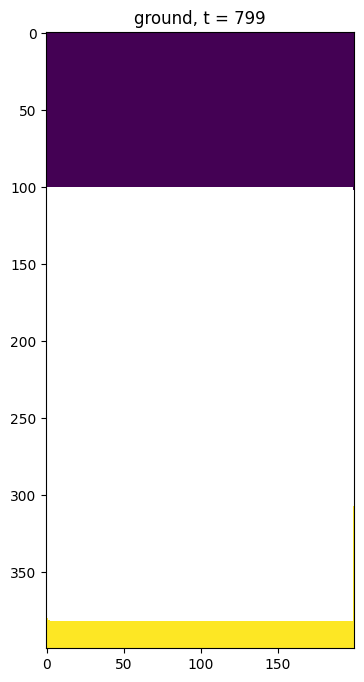

In [40]:
make_animated_plot(stacked_data["ground"][700:800,:,:,:],title="ground, t = {}",frame_start_offset=700)

(400, 200, 1)
AxesImage(size=(400, 200))


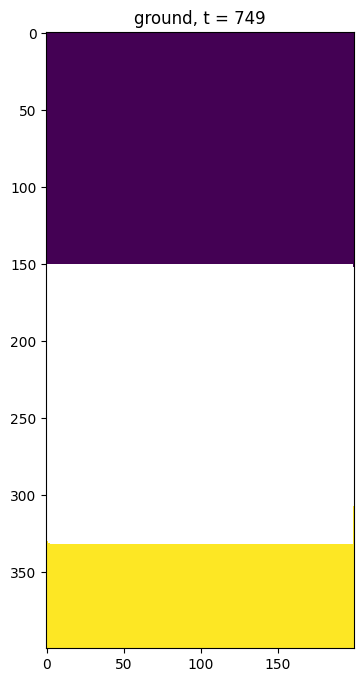

In [41]:
make_animated_plot(stacked_data["ground"][700:750,:,:,:],title="ground, t = {}",frame_start_offset=700)

(400, 200, 1)
AxesImage(size=(400, 200))


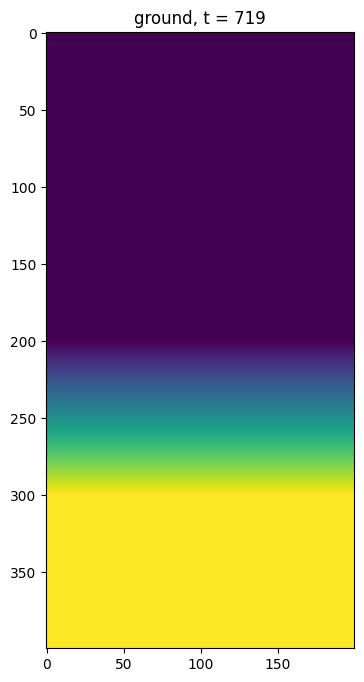

In [43]:
make_animated_plot(stacked_data["ground"][705:720,:,:,:],title="ground, t = {}",frame_start_offset=705)

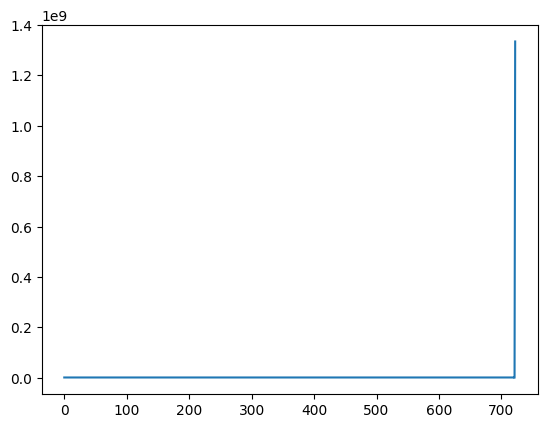

In [47]:

def get_sums(data):
    sums = np.zeros(data.shape[0])
    for i in range(0,data.shape[0]):
        s = np.sum(data[i,:,:])
        sums[i]=s
    return sums

plt.plot(get_sums(stacked_data["water"]))
plt.show()

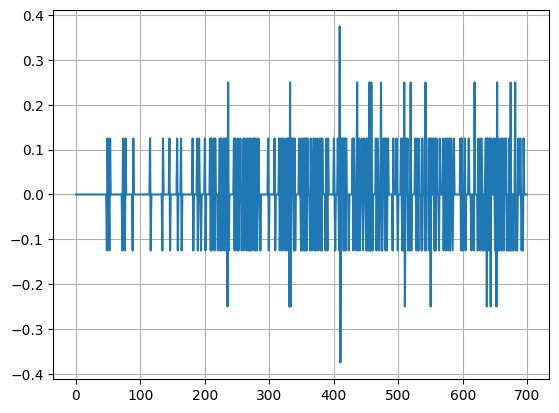

In [24]:
plt.plot(np.diff(sums)[0:700])
plt.grid(True)
plt.show()

In [20]:
arr=  np.array([1,2,3,4])
print(np.diff(arr))

[1 1 1]


In [12]:
nan_table = np.isnan(stacked_data["water"])
print(nan_table.shape)
print(nan_table[0,0,0,0])

(1000, 400, 200, 1)
False


In [13]:
for i, layer in enumerate(nan_table):
    contains_nan = not np.all(layer == False)
    if contains_nan:
        print("layer {} contains nan".format(i))

layer 720 contains nan
layer 723 contains nan
layer 724 contains nan
layer 725 contains nan
layer 726 contains nan
layer 727 contains nan
layer 728 contains nan
layer 729 contains nan
layer 730 contains nan
layer 731 contains nan
layer 732 contains nan
layer 733 contains nan
layer 734 contains nan
layer 735 contains nan
layer 736 contains nan
layer 737 contains nan
layer 738 contains nan
layer 739 contains nan
layer 740 contains nan
layer 741 contains nan
layer 742 contains nan
layer 743 contains nan
layer 744 contains nan
layer 745 contains nan
layer 746 contains nan
layer 747 contains nan
layer 748 contains nan
layer 749 contains nan
layer 750 contains nan
layer 751 contains nan
layer 752 contains nan
layer 753 contains nan
layer 754 contains nan
layer 755 contains nan
layer 756 contains nan
layer 757 contains nan
layer 758 contains nan
layer 759 contains nan
layer 760 contains nan
layer 761 contains nan
layer 762 contains nan
layer 763 contains nan
layer 764 contains nan
layer 765 c

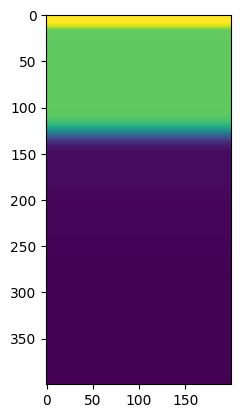

In [14]:
plt.imshow(stacked_data["water"][270,:,:,:])
plt.show()

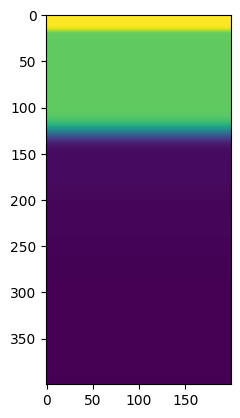

In [15]:
plt.imshow(stacked_data["water"][269,:,:,:])
plt.show()

In [16]:
velocity = np.copy(stacked_data["velocity"])
velocity[np.isnan(velocity)] = 0.0
velocity[np.isinf(velocity)] = 0.0
velocity[velocity>100.0] = 100.0
velocity[velocity<-100.0] = -100.0
print(np.max(velocity))
plt.show()

velocity_magnitude = np.sqrt(
    np.power(velocity[:,:,:,0],2.0)+np.power(velocity[:,:,:,1],2.0)
)
print(velocity_magnitude.shape)

100.0
(1000, 400, 200)


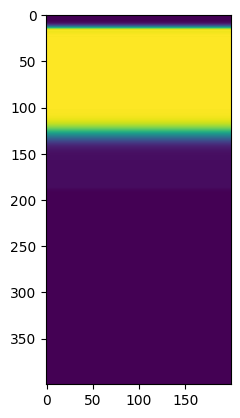

38.5401


In [17]:
plt.imshow(velocity_magnitude[270,:,:])
plt.show()
print(np.max(velocity_magnitude[270,:,:]))

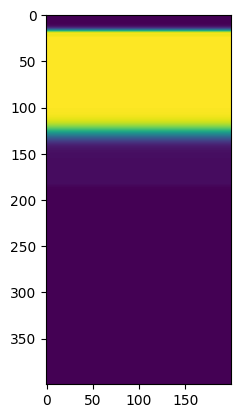

In [18]:
plt.imshow(velocity_magnitude[269,:,:])
plt.show()

In [19]:
print(np.where([[True, False], [True, True]],
         [[0, 0], [0, 0]], [[1, 1], [1, 1]]))

[[0 1]
 [0 0]]


nan


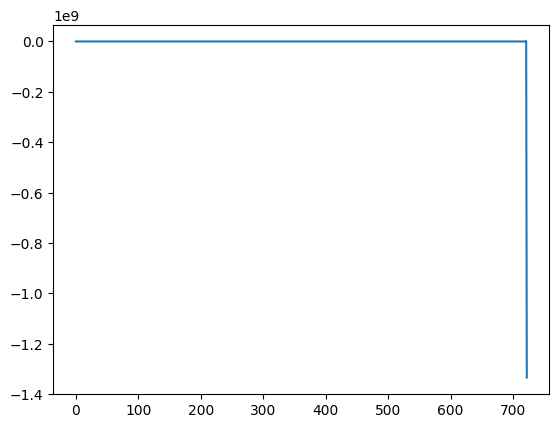

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [49]:
print(np.max(stacked_data["dissolved"]))
d_sums = get_sums(stacked_data["dissolved"])
plt.plot(d_sums)
plt.show()
print(d_sums)